<a href="https://colab.research.google.com/github/ByteBoss-ai/Computer_Vision/blob/main/MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [13]:
#Loading the dataset
from keras.datasets import mnist
#Splitting the dataset into training and testing parts
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
#Exploring the shapes of training and testing datasets
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


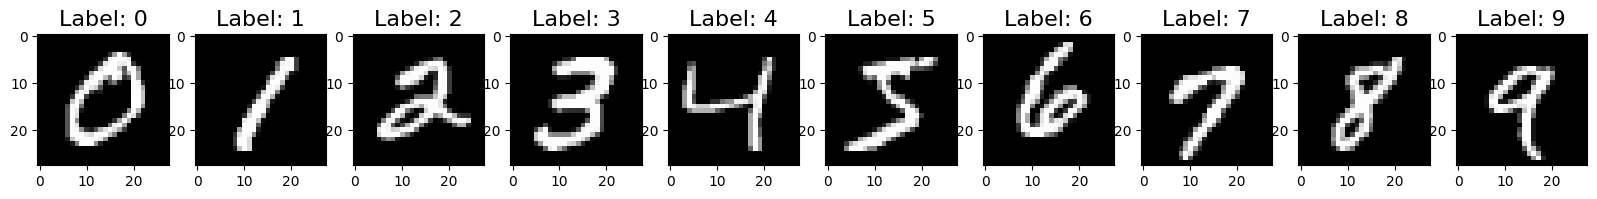

In [15]:
#Visualizing Examples of digits (0–9) from the training dataset

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [16]:
#Prints labels of the first 10 training samples
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [17]:
# Converts labels into one-hot encoded format for classification
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
#Prints the one-hot encoded labels of the first 10 training samples
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


**Preprocessing Data**

In [ ]:
# Normalization of data by scaling image pixel values to [0,1] for better training performance
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
# Reshapes Data by flattening 28 × 28 images into 1D vectors for model input
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


**Building Model**

In [22]:
#Model Creation
model = Sequential() #building a stack of layers

#First Layer: takes  image as input and starts learning features
model.add(Dense(units=128, input_shape=(784,), activation='relu'))

#Second Layer: deepens the network, letting it learn more patterns
model.add(Dense(units=128, activation='relu'))

#Dropout Layer: Randomly drops out 25% of neurons during training
model.add(Dropout(0.25))

#Output Layer: converts outputs (0-9 class) into probabilities for predictions
model.add(Dense(units=10, activation='softmax'))

#Compiling the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Prints a table of all layers, number of parameters, and total trainable weights.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

**Training the Model**

In [23]:
batch_size = 512 # Looks at 512 images at a time before updating weights
epochs=10 # Sees the dataset 10 times in total
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs) # runs for 10 epochs and updating weights after each batch

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6277 - loss: 18.3488
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8393 - loss: 1.1221
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8666 - loss: 0.5463
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8912 - loss: 0.4058
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9121 - loss: 0.3126
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9217 - loss: 0.2761
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9344 - loss: 0.2311
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9398 - loss: 0.2047
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9455 - loss: 0.1889
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9488 - loss: 0.1684


**Evaluating the Model**

In [24]:
# Runs the trained model on the test set (10,000 images)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9386 - loss: 0.2622
Test Loss: 0.23638828098773956, Test Accuracy: 0.9480000138282776


In [25]:
# Runs the trained model on all x_test images
y_pred = model.predict(x_test)
#Finds the index of the largest value in each row
y_pred_classes = np.argmax(y_pred, axis=1)
# Prints the raw probabilities for each digit
print(y_pred)
#Prints the final predicted digits
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[2.15848272e-22 1.34602479e-18 7.75903567e-16 ... 9.99999940e-01
  3.22883134e-20 9.26645538e-10]
 [1.13321406e-07 3.40825027e-05 9.99961317e-01 ... 9.55815491e-14
  1.28782767e-13 1.70076904e-17]
 [8.23940881e-15 9.99999940e-01 1.09406917e-09 ... 4.71352790e-10
  4.33142942e-13 2.28640864e-19]
 ...
 [3.88019248e-22 2.22586230e-22 7.74025159e-19 ... 2.95144131e-09
  3.94230997e-19 7.93153043e-12]
 [9.93694359e-25 4.43422595e-15 2.44100811e-28 ... 2.76618888e-24
  2.39708497e-09 5.37187181e-20]
 [1.04520170e-27 0.00000000e+00 1.88149033e-16 ... 1.84849367e-32
  0.00000000e+00 1.62616391e-25]]
[7 2 1 ... 4 5 6]


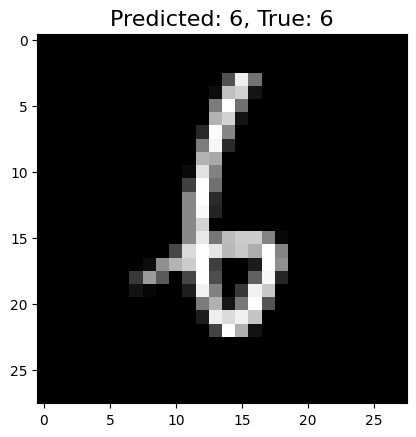

In [26]:
# Single Example
random_idx = np.random.choice(len(x_test)) #Picks a random index from the test set
x_sample = x_test[random_idx] #Fetches the test image at that index
y_true = np.argmax(y_test, axis=1) #Converts the one-hot encoded test labels back into digit labels
y_sample_true = y_true[random_idx] #true label for chosen image
y_sample_pred_class = y_pred_classes[random_idx] # model’s predicted digit for chosen image

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

**Confusuion Matrix**

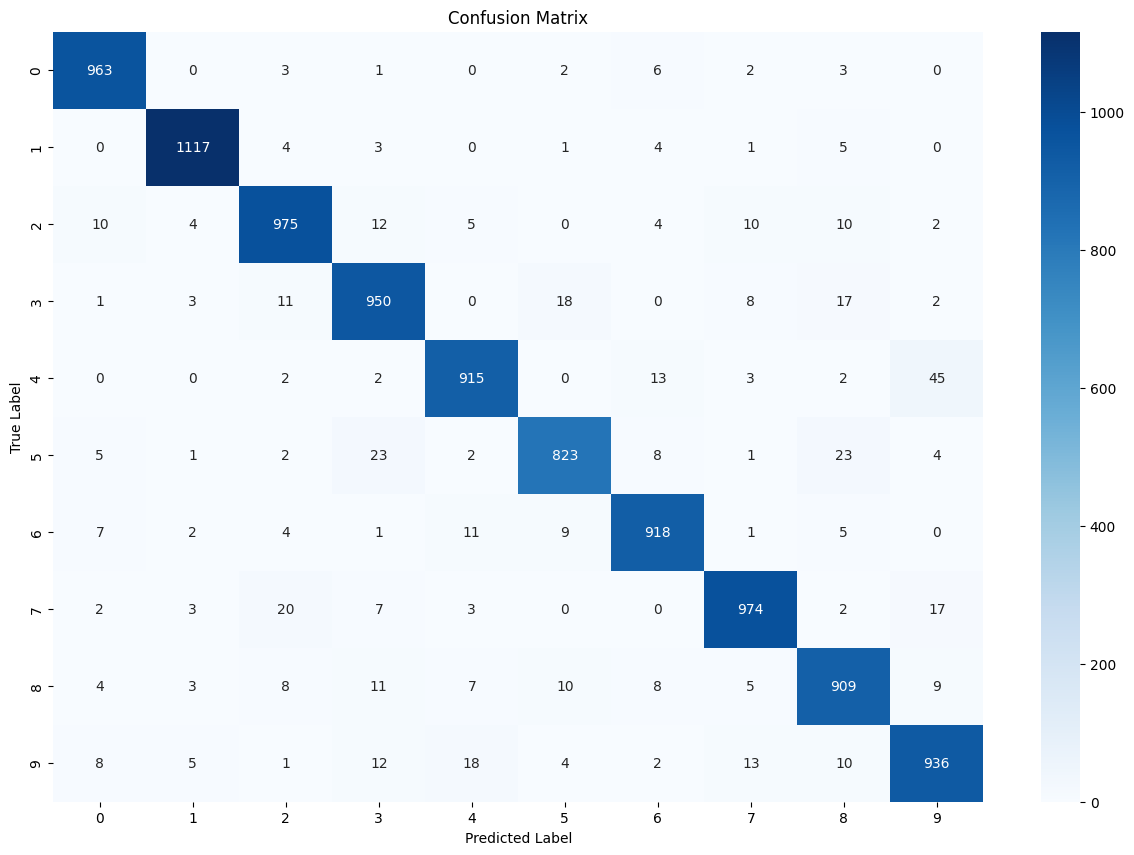

In [27]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
#plot a confusion matrix heatmap
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');